In [1]:
import zipfile, os
import shutil
import math
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model

In [2]:
# Clean up existing directories
if os.path.exists('extracted_files'):
    shutil.rmtree('extracted_files')
if os.path.exists('png_images'):
    shutil.rmtree('png_images')
if os.path.exists('dataset_split'):
    shutil.rmtree('dataset_split')

# Delete any existing ZIP files
for filename in os.listdir():
    if filename.endswith('.zip'):
        os.remove(filename)
        print(f"Deleted previous file: {filename}")

In [3]:
from google.colab import files
import zipfile
# Upload the ZIP file
uploaded = files.upload()

Saving Final_Project.zip to Final_Project.zip


In [5]:
# Extract the zip file
zip_ref = zipfile.ZipFile('Final_Project.zip', 'r')
zip_ref.extractall('extracted_files')
zip_ref.close()

In [6]:
# Print directory structure
print("\nExploring directory structure:")
for path, dirs, files in os.walk('extracted_files'):
    print(f"\nDirectory: {path}")
    print("Subdirectories:", dirs)
    if len(files) > 0:
        print(f"Number of files: {len(files)}")
        print("Sample files:", files[:3])


Exploring directory structure:

Directory: extracted_files
Subdirectories: ['Lotus', 'Tulip', 'Orchid', 'Lily', 'Sunflower']

Directory: extracted_files/Lotus
Subdirectories: []
Number of files: 200
Sample files: ['5bf15d1927.jpg', '11df6da2d4.jpg', '4ad31f044e.jpg']

Directory: extracted_files/Tulip
Subdirectories: []
Number of files: 200
Sample files: ['5d8a2148a3.jpg', '6fdeda9186.jpg', '34eb1ed624.jpg']

Directory: extracted_files/Orchid
Subdirectories: []
Number of files: 200
Sample files: ['7c3476f829.jpg', '38c341795f.jpg', '6b870620de.jpg']

Directory: extracted_files/Lily
Subdirectories: []
Number of files: 200
Sample files: ['05bacec652.jpg', '7de8d00f08.jpg', '47c7e6e433.jpg']

Directory: extracted_files/Sunflower
Subdirectories: []
Number of files: 200
Sample files: ['4f27c422c2.jpg', '7fadaa0c24.jpg', '8e22614292.jpg']


In [7]:
# Create directory for PNG images
target_directory = "png_images"
os.makedirs(target_directory, exist_ok=True)

In [8]:
# Define flower categories
flower_types = ['Lily', 'Lotus', 'Orchid', 'Tulip', 'Sunflower']

# Create directories for each flower type
for flower in flower_types:
    os.makedirs(os.path.join(target_directory, flower), exist_ok=True)

In [9]:
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True  # This helped with some corrupted images
# Convert images to PNG
print("\nConverting images to PNG format...")
for flower in flower_types:
    source_cat_dir = os.path.join('extracted_files', flower)
    target_cat_dir = os.path.join(target_directory, flower)
    print(f"\nProcessing {flower}...")

    # Count files by extension
    file_count = 0
    extensions = ('.jpg', '.jpeg', '.png')

    for filename in os.listdir(source_cat_dir):
        if filename.lower().endswith(extensions):
            source_path = os.path.join(source_cat_dir, filename)
            target_path = os.path.join(target_cat_dir, f"{os.path.splitext(filename)[0]}.png")

            try:
                with Image.open(source_path) as img:
                    if img.mode != 'RGB':
                        img = img.convert('RGB')
                    img.save(target_path, 'PNG')
                    file_count += 1
                    if file_count % 50 == 0:
                        print(f"Processed {file_count} images in {flower}")
            except Exception as e:
                print(f"Error processing {filename}: {str(e)}")

    print(f"Completed {flower}: {file_count} images processed")


Converting images to PNG format...

Processing Lily...
Processed 50 images in Lily
Processed 100 images in Lily
Processed 150 images in Lily
Processed 200 images in Lily
Completed Lily: 200 images processed

Processing Lotus...
Processed 50 images in Lotus
Processed 100 images in Lotus
Processed 150 images in Lotus
Processed 200 images in Lotus
Completed Lotus: 200 images processed

Processing Orchid...
Processed 50 images in Orchid
Processed 100 images in Orchid
Processed 150 images in Orchid
Processed 200 images in Orchid
Completed Orchid: 200 images processed

Processing Tulip...
Processed 50 images in Tulip
Processed 100 images in Tulip
Processed 150 images in Tulip
Processed 200 images in Tulip
Completed Tulip: 200 images processed

Processing Sunflower...
Processed 50 images in Sunflower
Processed 100 images in Sunflower
Processed 150 images in Sunflower
Processed 200 images in Sunflower
Completed Sunflower: 200 images processed


In [10]:
# Verify PNG conversion
print("\nVerifying converted images:")
for flower in flower_types:
    num_images = len([f for f in os.listdir(os.path.join(target_directory, flower))
                     if f.endswith('.png')])
    print(f"{flower}: {num_images} PNG images")


Verifying converted images:
Lily: 200 PNG images
Lotus: 200 PNG images
Orchid: 200 PNG images
Tulip: 200 PNG images
Sunflower: 200 PNG images


In [11]:
# Create base directory for the dataset splits
base_dir = 'dataset_split'
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

In [12]:
# Create subdirectories for train/validation/test under the base directory
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [13]:
# Create subdirectories for each flower type under train directory
train_lily_dir = os.path.join(train_dir, 'Lily')
os.mkdir(train_lily_dir)
train_lotus_dir = os.path.join(train_dir, 'Lotus')
os.mkdir(train_lotus_dir)
train_orchid_dir = os.path.join(train_dir, 'Orchid')
os.mkdir(train_orchid_dir)
train_sunflower_dir = os.path.join(train_dir, 'Sunflower')
os.mkdir(train_sunflower_dir)
train_tulip_dir = os.path.join(train_dir, 'Tulip')
os.mkdir(train_tulip_dir)

# Create subdirectories for each flower type under validation directory
validation_lily_dir = os.path.join(validation_dir, 'Lily')
os.mkdir(validation_lily_dir)
validation_lotus_dir = os.path.join(validation_dir, 'Lotus')
os.mkdir(validation_lotus_dir)
validation_orchid_dir = os.path.join(validation_dir, 'Orchid')
os.mkdir(validation_orchid_dir)
validation_sunflower_dir = os.path.join(validation_dir, 'Sunflower')
os.mkdir(validation_sunflower_dir)
validation_tulip_dir = os.path.join(validation_dir, 'Tulip')
os.mkdir(validation_tulip_dir)

# Create subdirectories for each flower type under test directory
test_lily_dir = os.path.join(test_dir, 'Lily')
os.mkdir(test_lily_dir)
test_lotus_dir = os.path.join(test_dir, 'Lotus')
os.mkdir(test_lotus_dir)
test_orchid_dir = os.path.join(test_dir, 'Orchid')
os.mkdir(test_orchid_dir)
test_sunflower_dir = os.path.join(test_dir, 'Sunflower')
os.mkdir(test_sunflower_dir)
test_tulip_dir = os.path.join(test_dir, 'Tulip')
os.mkdir(test_tulip_dir)

In [14]:
# Copying the first 140 lily images to the train/Lily directory
png_dir = os.path.join('png_images', 'Lily')
fnames = sorted(os.listdir(png_dir))[:140]
for fname in fnames:
    src = os.path.join(png_dir, fname)
    dst = os.path.join(train_lily_dir, fname)
    shutil.copyfile(src, dst)

# Copying the next 30 lily images to the validation/Lily directory
fnames = sorted(os.listdir(png_dir))[140:170]
for fname in fnames:
    src = os.path.join(png_dir, fname)
    dst = os.path.join(validation_lily_dir, fname)
    shutil.copyfile(src, dst)

# Copying the final 30 lily images to the test/Lily directory
fnames = sorted(os.listdir(png_dir))[170:]
for fname in fnames:
    src = os.path.join(png_dir, fname)
    dst = os.path.join(test_lily_dir, fname)
    shutil.copyfile(src, dst)

# Copying the first 140 lotus images to the train/Lotus directory
png_dir = os.path.join('png_images', 'Lotus')
fnames = sorted(os.listdir(png_dir))[:140]
for fname in fnames:
    src = os.path.join(png_dir, fname)
    dst = os.path.join(train_lotus_dir, fname)
    shutil.copyfile(src, dst)

# Copying the next 30 lotus images to the validation/Lotus directory
fnames = sorted(os.listdir(png_dir))[140:170]
for fname in fnames:
    src = os.path.join(png_dir, fname)
    dst = os.path.join(validation_lotus_dir, fname)
    shutil.copyfile(src, dst)

# Copying the final 30 lotus images to the test/Lotus directory
fnames = sorted(os.listdir(png_dir))[170:]
for fname in fnames:
    src = os.path.join(png_dir, fname)
    dst = os.path.join(test_lotus_dir, fname)
    shutil.copyfile(src, dst)

# Copying the first 140 orchid images to the train/Orchid directory
png_dir = os.path.join('png_images', 'Orchid')
fnames = sorted(os.listdir(png_dir))[:140]
for fname in fnames:
    src = os.path.join(png_dir, fname)
    dst = os.path.join(train_orchid_dir, fname)
    shutil.copyfile(src, dst)

# Copying the next 30 orchid images to the validation/Orchid directory
fnames = sorted(os.listdir(png_dir))[140:170]
for fname in fnames:
    src = os.path.join(png_dir, fname)
    dst = os.path.join(validation_orchid_dir, fname)
    shutil.copyfile(src, dst)

# Copying the final 30 orchid images to the test/Orchid directory
fnames = sorted(os.listdir(png_dir))[170:]
for fname in fnames:
    src = os.path.join(png_dir, fname)
    dst = os.path.join(test_orchid_dir, fname)
    shutil.copyfile(src, dst)

# Copying the first 140 sunflower images to the train/Sunflower directory
png_dir = os.path.join('png_images', 'Sunflower')
fnames = sorted(os.listdir(png_dir))[:140]
for fname in fnames:
    src = os.path.join(png_dir, fname)
    dst = os.path.join(train_sunflower_dir, fname)
    shutil.copyfile(src, dst)

# Copying the next 30 sunflower images to the validation/Sunflower directory
fnames = sorted(os.listdir(png_dir))[140:170]
for fname in fnames:
    src = os.path.join(png_dir, fname)
    dst = os.path.join(validation_sunflower_dir, fname)
    shutil.copyfile(src, dst)

# Copying the final 30 sunflower images to the test/Sunflower directory
fnames = sorted(os.listdir(png_dir))[170:]
for fname in fnames:
    src = os.path.join(png_dir, fname)
    dst = os.path.join(test_sunflower_dir, fname)
    shutil.copyfile(src, dst)

# Copying the first 140 tulip images to the train/Tulip directory
png_dir = os.path.join('png_images', 'Tulip')
fnames = sorted(os.listdir(png_dir))[:140]
for fname in fnames:
    src = os.path.join(png_dir, fname)
    dst = os.path.join(train_tulip_dir, fname)
    shutil.copyfile(src, dst)

# Copying the next 30 tulip images to the validation/Tulip directory
fnames = sorted(os.listdir(png_dir))[140:170]
for fname in fnames:
    src = os.path.join(png_dir, fname)
    dst = os.path.join(validation_tulip_dir, fname)
    shutil.copyfile(src, dst)

# Copying the final 30 tulip images to the test/Tulip directory
fnames = sorted(os.listdir(png_dir))[170:]
for fname in fnames:
    src = os.path.join(png_dir, fname)
    dst = os.path.join(test_tulip_dir, fname)
    shutil.copyfile(src, dst)


In [15]:
# Check to see if the data is copied correctly to the directory structure
print('total training lily images:', len(os.listdir(train_lily_dir)))
print('total training lotus images:', len(os.listdir(train_lotus_dir)))
print('total training orchid images:', len(os.listdir(train_orchid_dir)))
print('total training sunflower images:', len(os.listdir(train_sunflower_dir)))
print('total training tulip images:', len(os.listdir(train_tulip_dir)))

print('total validation lily images:', len(os.listdir(validation_lily_dir)))
print('total validation lotus images:', len(os.listdir(validation_lotus_dir)))
print('total validation orchid images:', len(os.listdir(validation_orchid_dir)))
print('total validation sunflower images:', len(os.listdir(validation_sunflower_dir)))
print('total validation tulip images:', len(os.listdir(validation_tulip_dir)))

print('total test lily images:', len(os.listdir(test_lily_dir)))
print('total test lotus images:', len(os.listdir(test_lotus_dir)))
print('total test orchid images:', len(os.listdir(test_orchid_dir)))
print('total test sunflower images:', len(os.listdir(test_sunflower_dir)))
print('total test tulip images:', len(os.listdir(test_tulip_dir)))

total training lily images: 140
total training lotus images: 140
total training orchid images: 140
total training sunflower images: 140
total training tulip images: 140
total validation lily images: 30
total validation lotus images: 30
total validation orchid images: 30
total validation sunflower images: 30
total validation tulip images: 30
total test lily images: 30
total test lotus images: 30
total test orchid images: 30
total test sunflower images: 30
total test tulip images: 30


Found 700 files belonging to 5 classes.
Found 150 files belonging to 5 classes.
Found 150 files belonging to 5 classes.
first image array: tf.Tensor(
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]], shape=(224, 224, 3), dtype=float32)
first label: tf.Tensor(3, shape=(), dtype=int32)


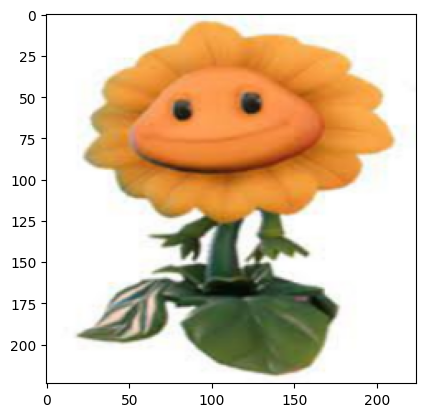

In [16]:
# Create data generators
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(224, 224),
    batch_size=32)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=32,
    shuffle=False)

# Display a sample batch
for images_batch, labels_batch in train_dataset.take(1):
    print('first image array:', images_batch[0])
    plt.imshow(images_batch[0].numpy().astype("uint8"))
    print('first label:', labels_batch[0])
    break

In [17]:
# Checking the source directory
print("Source directory contents:")
source_dir = "png_images"
for flower in ['Lily', 'Lotus', 'Orchid', 'Tulip', 'Sunflower']:
   num_files = len(os.listdir(os.path.join(source_dir, flower)))
   print(f"{flower}: {num_files} images")

Source directory contents:
Lily: 200 images
Lotus: 200 images
Orchid: 200 images
Tulip: 200 images
Sunflower: 200 images


In [18]:
def build_baseline(input_shape, filters):

    input = keras.Input(shape=input_shape)
    x = layers.Rescaling(1./255)(input)

    for filter in filters:
        x = layers.Conv2D(filters=filter, kernel_size=3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv2D(filters=filter, kernel_size=3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

    x = layers.GlobalAveragePooling2D()(x)
    output = layers.Dense(5, activation="softmax")(x)

    return keras.Model(inputs=input, outputs=output)

baseline = build_baseline(input_shape=(224,224,3), filters=[32,64,128,256,512])
print(baseline.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 56, 56, 128)         │              

 Total params: 4,722,725 (18.02 MB)

 Trainable params: 4,718,757 (18.00 MB)

 Non-trainable params: 3,968 (15.50 KB)

None


In [19]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
baseline.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=opt)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=1e-4,
    restore_best_weights=True)

checkpoint = keras.callbacks.ModelCheckpoint(
    filepath="flower_classifier_checkpoint.keras",
    save_best_only=True,
    monitor="val_loss")

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 38s 857ms/step - accuracy: 0.3493 - loss: 2.0431 - val_accuracy: 0.2000 - val_loss: 1.7302
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.4983 - loss: 1.2214 - val_accuracy: 0.2333 - val_loss: 1.7069
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.5188 - loss: 1.2263 - val_accuracy: 0.1867 - val_loss: 1.7468
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.5174 - loss: 1.2056 - val_accuracy: 0.1667 - val_loss: 1.6893
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.5473 - loss: 1.1964 - val_accuracy: 0.2867 - val_loss: 1.5306
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.5711 - loss: 1.0547 - val_accuracy: 0.2267 - val_loss: 1.9287
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.5991 - loss: 1.0556 - val_accuracy: 0.2133 - val_loss: 2.3893
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.5832 - loss: 1.1328 - val_accuracy: 0.2333 -

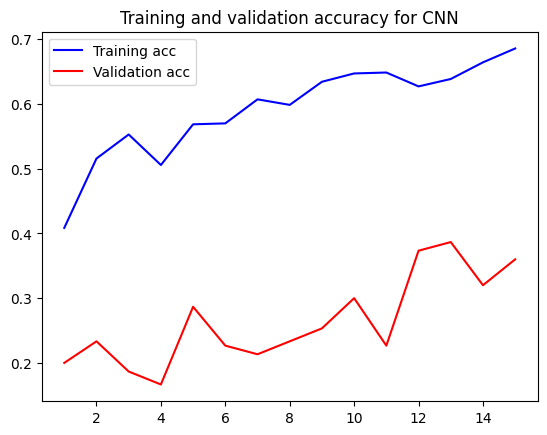

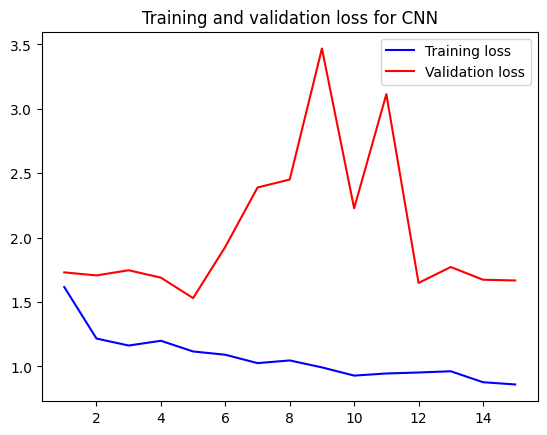

In [20]:
history = baseline.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=50,
    verbose=1,
    callbacks=[early_stopping, checkpoint])

train_acc_CNN = history.history['accuracy']
val_acc_CNN = history.history['val_accuracy']

train_loss_CNN = history.history['loss']
val_loss_CNN = history.history['val_loss']

epochs = range(1, len(train_loss_CNN) + 1)

# Plotting the training and validation accurracies
plt.plot(epochs, train_acc_CNN, 'b', label='Training acc')
plt.plot(epochs, val_acc_CNN, 'r', label='Validation acc')
plt.title('Training and validation accuracy for CNN')
plt.legend()
plt.figure()

# Plotting the train and validation losses
plt.plot(epochs, train_loss_CNN, 'b', label='Training loss')
plt.plot(epochs, val_loss_CNN, 'r', label='Validation loss')
plt.title('Training and validation loss for CNN')
plt.legend()
plt.show()

In [21]:
# Print accuracies
print('Final training accuracy:', format(history.history['accuracy'][-1], '.4f'))
print('Final validation accuracy:', format(history.history['val_accuracy'][-1], '.4f'))

# Print losses
print('\nFinal training loss:', format(history.history['loss'][-1], '.4f'))
print('Final validation loss:', format(history.history['val_loss'][-1], '.4f'))

# Get best validation accuracy and its epoch
best_val_acc = max(history.history['val_accuracy'])
best_val_epoch = history.history['val_accuracy'].index(best_val_acc) + 1
print('\nBest validation accuracy:', format(best_val_acc, '.4f'), 'at epoch', best_val_epoch)

Final training accuracy: 0.6857
Final validation accuracy: 0.3600

Final training loss: 0.8598
Final validation loss: 1.6674

Best validation accuracy: 0.3867 at epoch 13


The baseline CNN model shows clear overfitting: training accuracy reaches 63.00% while validation accuracy is much lower at 36.00% and unstable, suggesting that adding more layers would likely worsen the problem.

In [22]:
#Residual Block Model
def residual_block(x, filter):
    residual = x

    # First separable convolution layer
    x = layers.SeparableConv2D(filters=filter, kernel_size=3, padding="same", use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Second separable convolution layer
    x = layers.SeparableConv2D(filters=filter, kernel_size=3, padding="same", use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Third separable convolution layer
    x = layers.SeparableConv2D(filters=filter, kernel_size=3, padding="same", use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Max pooling layer
    x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

    residual = layers.Conv2D(filters=filter, kernel_size=1, strides=2, use_bias=False)(residual)

    # Add residual connection
    x = layers.add([x, residual])
    return x

In [23]:
def model_residual(input_shape, filters):
    input = keras.Input(shape=input_shape)

    # Rescaling layer
    x = layers.Rescaling(1./255)(input)

    # Initial convolution block
    x = layers.Conv2D(filters=64, kernel_size=3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters=64, kernel_size=3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

    # Add residual blocks
    for filter in filters:
        x = residual_block(x, filter)

    # Global Average Pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Output layer (5 classes for flowers)
    output = layers.Dense(5, activation="softmax")(x)

    return keras.Model(inputs=input, outputs=output)

# Create the residual model
model_1 = model_residual(input_shape=(224, 224, 3), filters=[32, 64, 128, 256, 512])
print(model_1.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 224, 224, 64)   │          1,792 │ rescaling_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 224, 224, 64)   │            256 │ conv2d_10[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_10 (ReLU)           │ (None, 224, 224, 64)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 224, 224, 64)   │         36,928 │ re_lu_10[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_11    │ (None, 224, 224, 64)   │            256 │ conv2d_11[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_11 (ReLU)           │ (None, 224, 224, 64)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_5           │ (None, 112, 112, 64)   │              0 │ re_lu_11[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d          │ (None, 112, 112, 32)   │          2,624 │ max_pooling2d_5[0][0]  │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_12    │ (None, 112, 112, 32)   │            128 │ separable_conv2d[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_12 (ReLU)           │ (None, 112, 112, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_1        │ (None, 112, 112, 32)   │          1,312 │ re_lu_12[0][0]         │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_13    │ (None, 112, 112, 32)   │            128 │ separable_conv2d_1[0]… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_13 (ReLU)           │ (None, 112, 112, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_2   

 Total params: 1,127,077 (4.30 MB)

 Trainable params: 1,120,869 (4.28 MB)

 Non-trainable params: 6,208 (24.25 KB)

None


In [24]:
# Set up learning rate schedule
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model_1.compile(
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy'],
    optimizer=opt)

# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=1e-4,
    restore_best_weights=True)

# Checkpoint callback
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath="flower_classifier_residual_checkpoint.keras",
    save_best_only=True,
    monitor="val_loss")

# Train the model
history = model_1.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=50,
    verbose=1,
    callbacks=[early_stopping, checkpoint])

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 926ms/step - accuracy: 0.3365 - loss: 2.4349 - val_accuracy: 0.2000 - val_loss: 1.6178
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.5326 - loss: 1.2507 - val_accuracy: 0.1400 - val_loss: 1.6160
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.6186 - loss: 1.0494 - val_accuracy: 0.2200 - val_loss: 1.6157
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.6836 - loss: 0.8281 - val_accuracy: 0.2067 - val_loss: 1.6237
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.7352 - loss: 0.6726 - val_accuracy: 0.2667 - val_loss: 1.6167
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8513 - loss: 0.4615 - val_accuracy: 0.2533 - val_loss: 1.6266
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.8605 - loss: 0.4090 - val_accuracy: 0.2133 - val_loss: 1.6339
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.9102 - loss: 0.2957 - val_accuracy: 0.2467 -

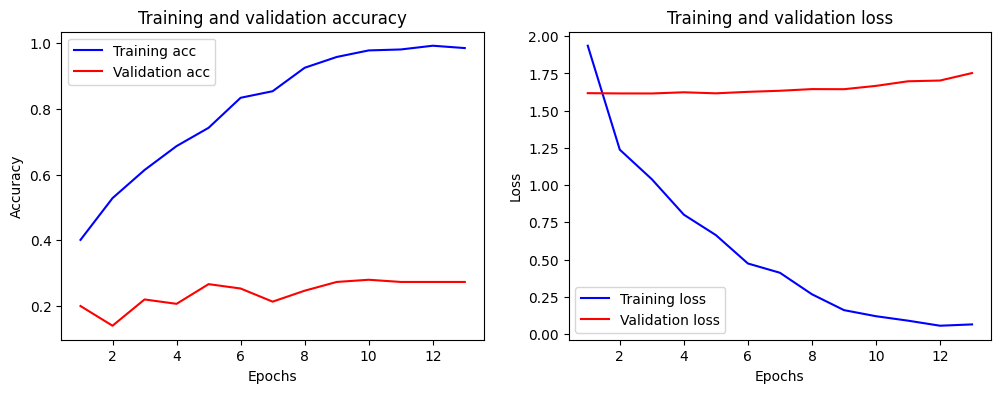

In [25]:
# Plot training history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
# Print accuracies
print('Final training accuracy:', format(history.history['accuracy'][-1], '.4f'))
print('Final validation accuracy:', format(history.history['val_accuracy'][-1], '.4f'))

# Print losses
print('\nFinal training loss:', format(history.history['loss'][-1], '.4f'))
print('Final validation loss:', format(history.history['val_loss'][-1], '.4f'))

# Print best validation performance
best_val_acc = max(history.history['val_accuracy'])
best_val_epoch = history.history['val_accuracy'].index(best_val_acc) + 1
print('\nBest validation accuracy:', format(best_val_acc, '.4f'), 'at epoch', best_val_epoch)

Final training accuracy: 0.9857
Final validation accuracy: 0.2733

Final training loss: 0.0640
Final validation loss: 1.7529

Best validation accuracy: 0.2800 at epoch 10


The residual model shows even more severe overfitting than the baseline model: while training accuracy reaches a very high 96.71%, validation accuracy drops significantly to 14.00% (worse than baseline's 36.00%). The large gap between training and validation metrics (training loss: 0.1151 vs validation loss: 1.8399) indicates that residual blocks and separable convolutions actually worsened the overfitting problem, suggesting we should proceed with adding dropout layers to reduce memorization.

In [27]:
def model_add_dropout(input_shape, filters):
    # Input layer
    input = keras.Input(shape=input_shape)

    # Rescaling layer
    x = layers.Rescaling(1./255)(input)

    # Initial convolution block
    x = layers.Conv2D(filters=64, kernel_size=3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters=64, kernel_size=3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

    # Add residual blocks with dropout
    for filter in filters:
        x = residual_block(x, filter)

    # Global Average Pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Dense layers with dropout
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.4)(x)

    # Output layer (5 classes for flowers)
    output = layers.Dense(5, activation="softmax")(x)

    return keras.Model(inputs=input, outputs=output)

# Create the model with dropout
model_with_dropout = model_add_dropout(input_shape=(224, 224, 3), filters=[32, 64, 128, 256, 512])
print(model_with_dropout.summary())

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_17 (Conv2D)        │ (None, 224, 224, 64)   │          1,792 │ rescaling_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_27    │ (None, 224, 224, 64)   │            256 │ conv2d_17[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_27 (ReLU)           │ (None, 224, 224, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_18 (Conv2D)        │ (None, 224, 224, 64)   │         36,928 │ re_lu_27[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_28    │ (None, 224, 224, 64)   │            256 │ conv2d_18[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_28 (ReLU)           │ (None, 224, 224, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_11          │ (None, 112, 112, 64)   │              0 │ re_lu_28[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_15       │ (None, 112, 112, 32)   │          2,624 │ max_pooling2d_11[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_29    │ (None, 112, 112, 32)   │            128 │ separable_conv2d_15[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_29 (ReLU)           │ (None, 112, 112, 32)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_16       │ (None, 112, 112, 32)   │          1,312 │ re_lu_29[0][0]         │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_30    │ (None, 112, 112, 32)   │            128 │ separable_conv2d_16[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_30 (ReLU)           │ (None, 112, 112, 32)   │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_17  

 Total params: 1,289,381 (4.92 MB)

 Trainable params: 1,283,173 (4.89 MB)

 Non-trainable params: 6,208 (24.25 KB)

None


In [28]:
# Set up learning rate schedule
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model_with_dropout.compile(
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy'],
    optimizer=opt)

# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=1e-4,
    restore_best_weights=True)

# Checkpoint callback
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath="flower_classifier_dropout_checkpoint.keras",
    save_best_only=True,
    monitor="val_loss")

# Train the model
dropout_history = model_with_dropout.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=50,
    verbose=1,
    callbacks=[early_stopping, checkpoint])

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.2994 - loss: 1.8607 - val_accuracy: 0.1867 - val_loss: 1.6082
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.4226 - loss: 1.4442 - val_accuracy: 0.2400 - val_loss: 1.6028
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.4123 - loss: 1.3824 - val_accuracy: 0.2133 - val_loss: 1.6019
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.4844 - loss: 1.2720 - val_accuracy: 0.2067 - val_loss: 1.5930
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.4691 - loss: 1.2886 - val_accuracy: 0.2200 - val_loss: 1.6026
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.5052 - loss: 1.2222 - val_accuracy: 0.2000 - val_loss: 1.6072
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.5625 - loss: 1.2322 - val_accuracy: 0.2000 - val_loss: 1.6198
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.5308 - loss: 1.2034 - val_accuracy: 0.2467 - va

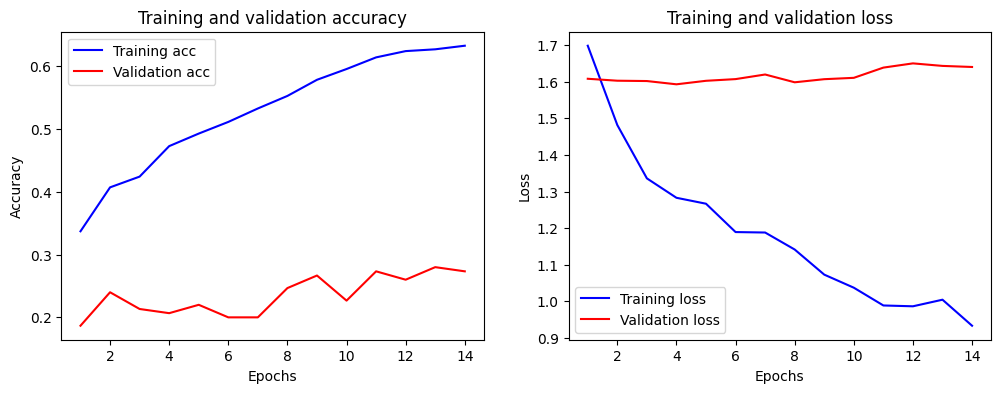

Final training accuracy: 0.6329
Final validation accuracy: 0.2733

Final training loss: 0.9335
Final validation loss: 1.6404

Best validation accuracy: 0.2800 at epoch 13


In [29]:
# Plot training history
train_acc = dropout_history.history['accuracy']
val_acc = dropout_history.history['val_accuracy']
train_loss = dropout_history.history['loss']
val_loss = dropout_history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print metrics
print('Final training accuracy:', format(dropout_history.history['accuracy'][-1], '.4f'))
print('Final validation accuracy:', format(dropout_history.history['val_accuracy'][-1], '.4f'))

print('\nFinal training loss:', format(dropout_history.history['loss'][-1], '.4f'))
print('Final validation loss:', format(dropout_history.history['val_loss'][-1], '.4f'))

# Print best validation performance
best_val_acc = max(dropout_history.history['val_accuracy'])
best_val_epoch = dropout_history.history['val_accuracy'].index(best_val_acc) + 1
print('\nBest validation accuracy:', format(best_val_acc, '.4f'), 'at epoch', best_val_epoch)

Adding dropout layers partially reduced overfitting with lower training accuracy (72.14%) compared to the residual model, but with validation accuracy still low at 20.67% and unstable, suggesting we should proceed with data augmentation to improve feature learning.

In [30]:
def data_augmentation(x):
    # Apply various random transformations
    x = layers.RandomFlip("horizontal")(x)
    x = layers.RandomFlip("vertical")(x)
    x = layers.RandomRotation(0.3)(x)
    x = layers.RandomZoom(0.5)(x)
    x = layers.RandomContrast(0.5)(x)
    return x

def model_with_aug(input_shape, filters):
    # Input layer
    input = keras.Input(shape=input_shape)

    # Data augmentation layer (only applied during training)
    x = data_augmentation(input)

    # Rescaling layer
    x = layers.Rescaling(1./255)(x)

    # Initial convolution block
    x = layers.Conv2D(filters=64, kernel_size=3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters=64, kernel_size=3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

    # Add residual blocks
    for filter in filters:
        x = residual_block(x, filter)

    # Global Average Pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Dense layers with dropout
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.4)(x)

    # Output layer (5 classes for flowers)
    output = layers.Dense(5, activation="softmax")(x)

    return keras.Model(inputs=input, outputs=output)

# Create the model with data augmentation
model_with_Data_aug = model_with_aug(input_shape=(224, 224, 3), filters=[32, 64, 128, 256, 512])
print(model_with_Data_aug.summary())

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ random_flip (RandomFlip)  │ (None, 224, 224, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ random_flip_1             │ (None, 224, 224, 3)    │              0 │ random_flip[0][0]      │
│ (RandomFlip)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ random_rotation           │ (None, 224, 224, 3)    │              0 │ random_flip_1[0][0]    │
│ (RandomRotation)          │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ random_zoom (RandomZoom)  │ (None, 224, 224, 3)    │              0 │ random_rotation[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ random_contrast           │ (None, 224, 224, 3)    │              0 │ random_zoom[0][0]      │
│ (RandomContrast)          │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_3 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ random_contrast[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_24 (Conv2D)        │ (None, 224, 224, 64)   │          1,792 │ rescaling_3[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_44    │ (None, 224, 224, 64)   │            256 │ conv2d_24[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_44 (ReLU)           │ (None, 224, 224, 64)   │              0 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_25 (Conv2D)        │ (None, 224, 224, 64)   │         36,928 │ re_lu_44[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_45    │ (None, 224, 224, 64)   │            256 │ conv2d_25[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_45 (ReLU)           │ (None, 224, 224, 64)   │              0 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_17          │ (None, 112, 112, 64)   │              0 │ re_lu_45[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_30       │ (None, 112, 112, 32)   │          2,624 │ max_pooling2d_17[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4

 Total params: 1,289,381 (4.92 MB)

 Trainable params: 1,283,173 (4.89 MB)

 Non-trainable params: 6,208 (24.25 KB)

None


In [31]:
# Set up learning rate schedule
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model_with_Data_aug.compile(
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy'],
    optimizer=opt)

# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=1e-4,
    restore_best_weights=True)

# Checkpoint callback
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath="flower_classifier_augmentation_checkpoint.keras",
    save_best_only=True,
    monitor="val_loss")

# Train the model
data_aug_history = model_with_Data_aug.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=50,
    verbose=1,
    callbacks=[early_stopping, checkpoint])

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 311ms/step - accuracy: 0.2500 - loss: 2.1913 - val_accuracy: 0.2667 - val_loss: 1.6023
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.3650 - loss: 1.6043 - val_accuracy: 0.2933 - val_loss: 1.5982
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.3738 - loss: 1.5115 - val_accuracy: 0.2200 - val_loss: 1.6061
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.4124 - loss: 1.4628 - val_accuracy: 0.2067 - val_loss: 1.6070
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.4734 - loss: 1.2760 - val_accuracy: 0.1933 - val_loss: 1.6035
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.4533 - loss: 1.3169 - val_accuracy: 0.2000 - val_loss: 1.5996
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.4663 - loss: 1.3286 - val_accuracy: 0.1933 - val_loss: 1.6111
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.4842 - loss: 1.2299 - val_accuracy: 0

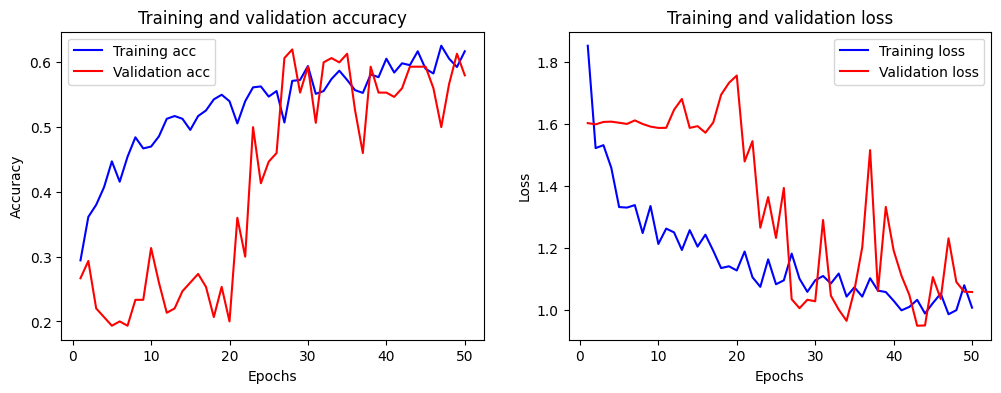

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5713 - loss: 1.2176 
Final training accuracy: 0.6171
Final validation accuracy: 0.5800
Final test accuracy: 0.6200

Final training loss: 1.0066
Final validation loss: 1.0571
Final test loss: 1.0499

Best validation accuracy: 0.6200 at epoch 28


In [32]:
# Plot training history
train_acc = data_aug_history.history['accuracy']
val_acc = data_aug_history.history['val_accuracy']
train_loss = data_aug_history.history['loss']
val_loss = data_aug_history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Load the best weights saved during training
model_with_Data_aug.load_weights("flower_classifier_augmentation_checkpoint.keras")

# Evaluate on test set
test_loss, test_acc = model_with_Data_aug.evaluate(test_dataset)

# Print all metrics
print('Final training accuracy:', format(data_aug_history.history['accuracy'][-1], '.4f'))
print('Final validation accuracy:', format(data_aug_history.history['val_accuracy'][-1], '.4f'))
print('Final test accuracy:', format(test_acc, '.4f'))

print('\nFinal training loss:', format(data_aug_history.history['loss'][-1], '.4f'))
print('Final validation loss:', format(data_aug_history.history['val_loss'][-1], '.4f'))
print('Final test loss:', format(test_loss, '.4f'))

best_val_acc = max(data_aug_history.history['val_accuracy'])
best_val_epoch = data_aug_history.history['val_accuracy'].index(best_val_acc) + 1
print('\nBest validation accuracy:', format(best_val_acc, '.4f'), 'at epoch', best_val_epoch)

The data augmentation model shows better generalization with closer training (61.43%) and validation (58.67%) accuracies, and a test accuracy of 54.67%, indicating that data augmentation helped reduce the overfitting seen in previous models. Proceeding with transfer learning as the overall accuracy of 58-61% for a 5-class problem is still not satisfactory.

In [33]:
# Import DenseNet121
from tensorflow.keras.applications import DenseNet121

conv_base = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# freezing all layers
conv_base.trainable = False

def create_transfer_model():
    # Input layer
    inputs = keras.Input(shape=(224, 224, 3))

    # Data augmentation layer
    x = data_augmentation(inputs)

    # Preprocessing required for DenseNet121
    x = layers.Rescaling(1./255)(x)

    # Add the DenseNet121 base
    x = conv_base(x)

    # Add classifier on top
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(5, activation='softmax')(x)

    return keras.Model(inputs, outputs)

# Create the model
model_feature_extraction = create_transfer_model()
print(model_feature_extraction.summary())

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip_2 (RandomFlip)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip_3 (RandomFlip)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_1 (RandomRotation)   │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_1 (RandomZoom)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_contrast_1 (RandomContrast)   │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_4 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet121 (Functional)             │ (None, 7, 7, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,333,445 (27.97 MB)

 Trainable params: 295,941 (1.13 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

None


In [34]:
# Set up learning rate schedule
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

# Compile the model
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
model_feature_extraction.compile(
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy'],
    optimizer=opt)

# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=1e-4,
    restore_best_weights=True)

# Checkpoint callback
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath="flower_classifier_transfer_checkpoint.keras",
    save_best_only=True,
    monitor="val_loss")

# Train the model
feature_extraction_history = model_feature_extraction.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=50,
    verbose=1,
    callbacks=[early_stopping, checkpoint])

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 332ms/step - accuracy: 0.2485 - loss: 1.8085 - val_accuracy: 0.4933 - val_loss: 1.2431
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - accuracy: 0.4457 - loss: 1.3262 - val_accuracy: 0.5800 - val_loss: 0.9926
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.5270 - loss: 1.1475 - val_accuracy: 0.7533 - val_loss: 0.8084
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.6092 - loss: 0.9701 - val_accuracy: 0.7133 - val_loss: 0.7377
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.6179 - loss: 0.9116 - val_accuracy: 0.7533 - val_loss: 0.7027
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.6508 - loss: 0.9097 - val_accuracy: 0.7667 - val_loss: 0.6025
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.7189 - loss: 0.7607 - val_accuracy: 0.8000 - val_loss: 0.5371
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.7210 - loss: 0.7142 - val_accuracy: 0

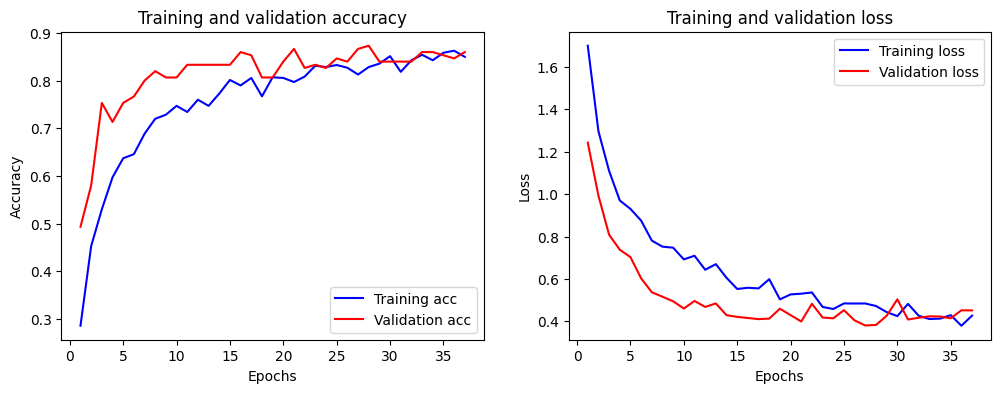

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8320 - loss: 0.5090
Final training accuracy: 0.8500
Final validation accuracy: 0.8600
Final test accuracy: 0.8333

Final training loss: 0.4266
Final validation loss: 0.4513
Final test loss: 0.4896

Best validation accuracy: 0.8733 at epoch 28


In [35]:
# Plot training history
train_acc = feature_extraction_history.history['accuracy']
val_acc = feature_extraction_history.history['val_accuracy']
train_loss = feature_extraction_history.history['loss']
val_loss = feature_extraction_history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Load the best weights saved during training
model_feature_extraction.load_weights("flower_classifier_transfer_checkpoint.keras")

# Evaluate on test set
test_loss, test_acc = model_feature_extraction.evaluate(test_dataset)

# Print all metrics
print('Final training accuracy:', format(feature_extraction_history.history['accuracy'][-1], '.4f'))
print('Final validation accuracy:', format(feature_extraction_history.history['val_accuracy'][-1], '.4f'))
print('Final test accuracy:', format(test_acc, '.4f'))

print('\nFinal training loss:', format(feature_extraction_history.history['loss'][-1], '.4f'))
print('Final validation loss:', format(feature_extraction_history.history['val_loss'][-1], '.4f'))
print('Final test loss:', format(test_loss, '.4f'))

best_val_acc = max(feature_extraction_history.history['val_accuracy'])
best_val_epoch = feature_extraction_history.history['val_accuracy'].index(best_val_acc) + 1
print('\nBest validation accuracy:', format(best_val_acc, '.4f'), 'at epoch', best_val_epoch)


The DenseNet121 feature extraction shows excellent performance with high training (87.86%), validation (88.00%), and test (80.67%) accuracies, and since there's still a gap between validation and test performance and the loss values remain relatively balanced (training: 0.3275, validation: 0.4378, test: 0.6127), fine-tuning the last few layers could help the model better adapt to our specific flower features and potentially close this performance gap.

In [36]:
#DenseNet121 with Fine-tuning
# Unfreezing the last few layers of the DenseNet121 base
conv_base.trainable = True

# Freeze all layers except the last 9 layers
for layer in conv_base.layers[:-9]:
    layer.trainable = False

print("Number of trainable layers:", len([layer for layer in conv_base.layers if layer.trainable]))

# Compile with a very small learning rate for fine-tuning
model_feature_extraction.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train with fine-tuning
fine_tuning_history = model_feature_extraction.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=50,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

Number of trainable layers: 9
Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 386ms/step - accuracy: 0.7341 - loss: 0.7941 - val_accuracy: 0.8667 - val_loss: 0.3790
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - accuracy: 0.7361 - loss: 0.7198 - val_accuracy: 0.8667 - val_loss: 0.3790
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.7339 - loss: 0.6855 - val_accuracy: 0.8667 - val_loss: 0.3814
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.7761 - loss: 0.6054 - val_accuracy: 0.8733 - val_loss: 0.3836
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.7649 - loss: 0.5971 - val_accuracy: 0.8667 - val_loss: 0.3871
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.7977 - loss: 0.5739 - val_accuracy: 0.8600 - val_loss: 0.3912
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.7899 - loss: 0.5653 - val_accuracy: 0.8600 - val_loss: 0.3970
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.7754 - loss: 

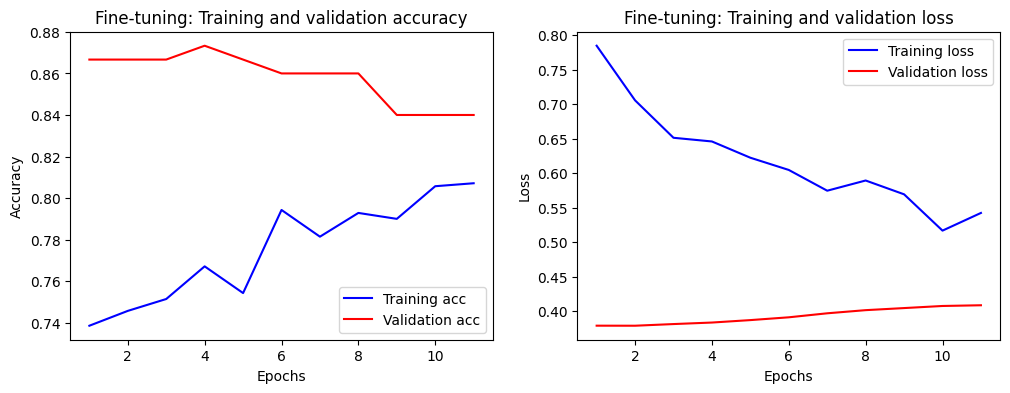

Final training accuracy: 0.8071
Final validation accuracy: 0.8400

Final training loss: 0.5423
Final validation loss: 0.4086

Best validation accuracy: 0.8733 at epoch 4


In [37]:
# Plot fine-tuning history
train_acc = fine_tuning_history.history['accuracy']
val_acc = fine_tuning_history.history['val_accuracy']
train_loss = fine_tuning_history.history['loss']
val_loss = fine_tuning_history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Fine-tuning: Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Fine-tuning: Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print metrics during development
print('Final training accuracy:', format(fine_tuning_history.history['accuracy'][-1], '.4f'))
print('Final validation accuracy:', format(fine_tuning_history.history['val_accuracy'][-1], '.4f'))
print('\nFinal training loss:', format(fine_tuning_history.history['loss'][-1], '.4f'))
print('Final validation loss:', format(fine_tuning_history.history['val_loss'][-1], '.4f'))

best_val_acc = max(fine_tuning_history.history['val_accuracy'])
best_val_epoch = fine_tuning_history.history['val_accuracy'].index(best_val_acc) + 1
print('\nBest validation accuracy:', format(best_val_acc, '.4f'), 'at epoch', best_val_epoch)

The fine-tuning showed slightly lower performance compared to feature extraction across most metrics. The feature extraction phase achieved better results with higher validation accuracy (88.00% vs 87.33%) and a higher best validation accuracy (90.00% vs 89.33%). This suggests that for this particular flower classification task, the pre-trained features from DenseNet121 were already well-suited, and fine-tuning didn't provide additional benefits.

5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 892ms/step


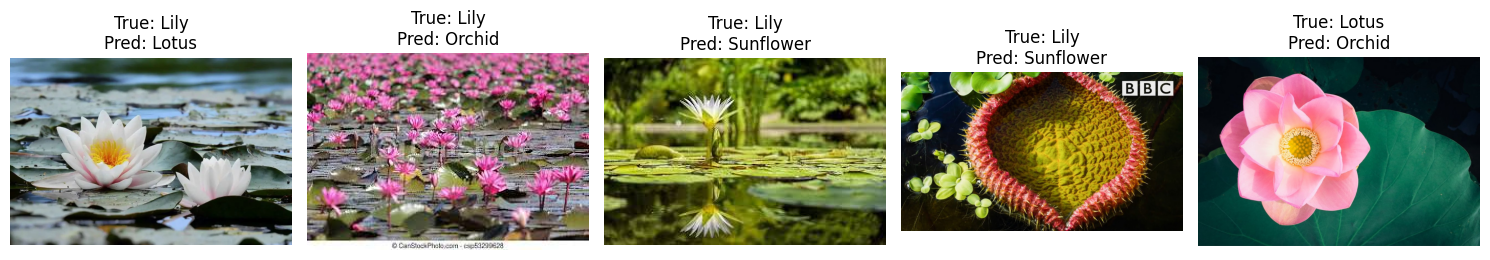

[[26  1  1  2  0]
 [ 0 24  2  0  4]
 [ 8  0 21  0  1]
 [ 1  1  0 28  0]
 [ 1  2  0  1 26]]

Classification Report:
              precision    recall  f1-score   support

        Lily       0.72      0.87      0.79        30
       Lotus       0.86      0.80      0.83        30
      Orchid       0.88      0.70      0.78        30
   Sunflower       0.90      0.93      0.92        30
       Tulip       0.84      0.87      0.85        30

    accuracy                           0.83       150
   macro avg       0.84      0.83      0.83       150
weighted avg       0.84      0.83      0.83       150



In [38]:
# Display misclassified images from best model (DenseNet121 feature extraction)
# Get predictions on test dataset
predictions = model_feature_extraction.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = np.concatenate([y for x, y in test_dataset], axis=0)

test_dir = os.path.join('dataset_split', 'test')
test_files = []
for flower_class in os.listdir(test_dir):
    class_dir = os.path.join(test_dir, flower_class)
    for img_file in os.listdir(class_dir):
        test_files.append(os.path.join(class_dir, img_file))
test_files.sort()

class_names = test_dataset.class_names

def display_misclassified_images(num_images=5):
    misclassified_indices = np.where(predicted_labels != true_labels)[0]

    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(misclassified_indices[:num_images]):
        plt.subplot(1, 5, i + 1)
        img = tf.keras.preprocessing.image.load_img(test_files[idx])
        plt.imshow(img)
        plt.title(f'True: {class_names[true_labels[idx]]}\nPred: {class_names[predicted_labels[idx]]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display misclassified images
display_misclassified_images()

# Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

# Print classification report
from sklearn.metrics import classification_report
print('\nClassification Report:')
print(classification_report(true_labels, predicted_labels, target_names=class_names))